In [182]:
import numpy as np
from sklearn.metrics import r2_score

In [150]:
# Activation Functions
def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.square(np.tanh(x))

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    return (1 - sigmoid(x)) * sigmoid(x)

def relu(x):
    return np.maximum(x, 0)

def d_relu(x):
    return (x>0).astype(x.dtype)


# Loss Functions 
def logloss(y, a):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a):
    return (a - y)/(a*(1 - a))

def mse(y, a):
    return np.power(y - a, 2)

def d_mse(y, a):
    return 2 * (a - y)



In [185]:
def r2_acc(y, a):
    return r2_score(y, a)

In [191]:
class Layer:
    
    activationFunctions = {
        'tanh': (tanh, d_tanh),
        'sigmoid': (sigmoid, d_sigmoid),
        'relu':(relu, d_relu)
    }
    
    
    def __init__(self, inputs, neurons, activation):
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunctions.get(activation)
        
    def forward_prop(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        self.A = self.act(self.Z)
        return self.A
    
    def backprop(self, dA, learning_rate):
        dZ = np.multiply(self.d_act(self.Z), dA)
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)
        
        self.W = self.W - learning_rate * dW
        self.b = self.b - learning_rate * db
        
        return dA_prev

In [218]:
x_train = np.random.randn(3, 1000) # dim x m
y_train = np.random.randn(1, 1000) # 1 x m

m = 1000
epochs = 1000

In [219]:
layers = [Layer(3, 64, 'tanh'), Layer(64, 32, 'tanh'), Layer(32, 1, 'tanh')]

In [233]:
costs = [] # to plot graph 
r2 = []
for epoch in range(epochs):
    A = x_train
    for layer in layers:
        A = layer.forward_prop(A)

    cost = 1/m * np.sum(mse(y_train, A))
    
    print(f"Loss at epoch {epoch+1}:{cost}, coefficient_of_dermination: {r2_acc(y_train[0], A[0])}")
    costs.append(cost)
    r2.append(r2_acc(y_train[0], A[0]))

    dA = d_mse(y_train, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA, learning_rate=0.1)

Loss at epoch 1:0.3726827799306252, coefficient_of_dermination: 0.6440502548677354
Loss at epoch 2:0.3728108579956542, coefficient_of_dermination: 0.6439279273627925
Loss at epoch 3:0.37274169483284547, coefficient_of_dermination: 0.6439939851779105
Loss at epoch 4:0.3728942912513163, coefficient_of_dermination: 0.643848240165831
Loss at epoch 5:0.37281802377534556, coefficient_of_dermination: 0.6439210833184948
Loss at epoch 6:0.3729960102396034, coefficient_of_dermination: 0.643751088244933
Loss at epoch 7:0.37291039112177493, coefficient_of_dermination: 0.6438328631613248
Loss at epoch 8:0.37311415497999695, coefficient_of_dermination: 0.6436382480695977
Loss at epoch 9:0.37301671859212243, coefficient_of_dermination: 0.6437313096739923
Loss at epoch 10:0.37324612279322805, coefficient_of_dermination: 0.6435122054617423
Loss at epoch 11:0.37313424858069427, coefficient_of_dermination: 0.643619056648818
Loss at epoch 12:0.37338862785857596, coefficient_of_dermination: 0.6433760987124

Loss at epoch 137:0.3844711672185548, coefficient_of_dermination: 0.6327911528200367
Loss at epoch 138:0.3822907331595948, coefficient_of_dermination: 0.634873687858841
Loss at epoch 139:0.3842234766195501, coefficient_of_dermination: 0.6330277223916273
Loss at epoch 140:0.3820269021813372, coefficient_of_dermination: 0.6351256731249332
Loss at epoch 141:0.3839596541263674, coefficient_of_dermination: 0.6332796995536147
Loss at epoch 142:0.38177328647555386, coefficient_of_dermination: 0.6353679017727176
Loss at epoch 143:0.3837128873487793, coefficient_of_dermination: 0.6335153867823242
Loss at epoch 144:0.3815658659429122, coefficient_of_dermination: 0.6355660093583235
Loss at epoch 145:0.38352294568369344, coefficient_of_dermination: 0.6336968002817349
Loss at epoch 146:0.3814442229875363, coefficient_of_dermination: 0.6356821906827499
Loss at epoch 147:0.38342792059126646, coefficient_of_dermination: 0.633787558855117
Loss at epoch 148:0.38144364328408586, coefficient_of_derminatio

Loss at epoch 285:0.367678101635331, coefficient_of_dermination: 0.6488302287747953
Loss at epoch 286:0.3676753478477896, coefficient_of_dermination: 0.6488328589203946
Loss at epoch 287:0.3674151701819178, coefficient_of_dermination: 0.64908135490369
Loss at epoch 288:0.3676925764043318, coefficient_of_dermination: 0.6488164039065317
Loss at epoch 289:0.3677389650844269, coefficient_of_dermination: 0.6487720980256431
Loss at epoch 290:0.3682484691064269, coefficient_of_dermination: 0.6482854701572759
Loss at epoch 291:0.36853152427409763, coefficient_of_dermination: 0.648015123846106
Loss at epoch 292:0.3691821001998319, coefficient_of_dermination: 0.6473937580427347
Loss at epoch 293:0.3696074770413916, coefficient_of_dermination: 0.6469874801396704
Loss at epoch 294:0.37027873062518024, coefficient_of_dermination: 0.6463463650816762
Loss at epoch 295:0.3707413430625461, coefficient_of_dermination: 0.6459045234188925
Loss at epoch 296:0.37130403931836903, coefficient_of_dermination: 

Loss at epoch 426:0.3787846503667911, coefficient_of_dermination: 0.6382223515044847
Loss at epoch 427:0.3828298032666827, coefficient_of_dermination: 0.6343588213891262
Loss at epoch 428:0.3848822384267303, coefficient_of_dermination: 0.6323985382436172
Loss at epoch 429:0.3914557772355988, coefficient_of_dermination: 0.6261201438834878
Loss at epoch 430:0.39368201030150496, coefficient_of_dermination: 0.6239938661612872
Loss at epoch 431:0.40084177152832784, coefficient_of_dermination: 0.6171555701059398
Loss at epoch 432:0.3995822611121387, coefficient_of_dermination: 0.6183585299306933
Loss at epoch 433:0.403610992770154, coefficient_of_dermination: 0.614510683762046
Loss at epoch 434:0.39856546318388203, coefficient_of_dermination: 0.6193296747833783
Loss at epoch 435:0.3988742701295297, coefficient_of_dermination: 0.6190347329199017
Loss at epoch 436:0.39157057503080833, coefficient_of_dermination: 0.626010500379288
Loss at epoch 437:0.3894236592079842, coefficient_of_dermination

Loss at epoch 554:0.3678015766172291, coefficient_of_dermination: 0.6487122976797632
Loss at epoch 555:0.3682291255066873, coefficient_of_dermination: 0.6483039452512915
Loss at epoch 556:0.3680114227409118, coefficient_of_dermination: 0.6485118734094072
Loss at epoch 557:0.3685984452486507, coefficient_of_dermination: 0.6479512075475301
Loss at epoch 558:0.3685478077704983, coefficient_of_dermination: 0.6479995714602547
Loss at epoch 559:0.36923625129084103, coefficient_of_dermination: 0.647342038274392
Loss at epoch 560:0.36926870264712486, coefficient_of_dermination: 0.6473110439472578
Loss at epoch 561:0.37000682441045957, coefficient_of_dermination: 0.6466060630152586
Loss at epoch 562:0.37007430576113004, coefficient_of_dermination: 0.6465416115008182
Loss at epoch 563:0.3708299325879708, coefficient_of_dermination: 0.6458199114628419
Loss at epoch 564:0.3709201998592362, coefficient_of_dermination: 0.645733697089839
Loss at epoch 565:0.3716877187936706, coefficient_of_derminatio

Loss at epoch 690:0.3652180400778301, coefficient_of_dermination: 0.6511798363541021
Loss at epoch 691:0.36504781361056415, coefficient_of_dermination: 0.6513424198457498
Loss at epoch 692:0.3651643506248937, coefficient_of_dermination: 0.6512311152113989
Loss at epoch 693:0.36500849011986347, coefficient_of_dermination: 0.6513799777562475
Loss at epoch 694:0.36512058241004164, coefficient_of_dermination: 0.6512729182829666
Loss at epoch 695:0.36497574773640246, coefficient_of_dermination: 0.6514112500437681
Loss at epoch 696:0.36507747605256297, coefficient_of_dermination: 0.6513140892138074
Loss at epoch 697:0.36494427593711576, coefficient_of_dermination: 0.6514413087949049
Loss at epoch 698:0.36503511186068327, coefficient_of_dermination: 0.6513545513014443
Loss at epoch 699:0.36491859282434824, coefficient_of_dermination: 0.6514658387649923
Loss at epoch 700:0.36500280482286407, coefficient_of_dermination: 0.6513854077898495
Loss at epoch 701:0.3649114212848951, coefficient_of_der

Loss at epoch 826:0.37052066732730327, coefficient_of_dermination: 0.6461152910635128
Loss at epoch 827:0.3713580856840638, coefficient_of_dermination: 0.6453154718426906
Loss at epoch 828:0.3703814920219309, coefficient_of_dermination: 0.6462482175552742
Loss at epoch 829:0.37116605011232506, coefficient_of_dermination: 0.6454988852347165
Loss at epoch 830:0.37018642564319815, coefficient_of_dermination: 0.6464345256744921
Loss at epoch 831:0.37092312946940686, coefficient_of_dermination: 0.6457308990158475
Loss at epoch 832:0.3699555109334981, coefficient_of_dermination: 0.646655072575211
Loss at epoch 833:0.3706473966313182, coefficient_of_dermination: 0.6459942517617419
Loss at epoch 834:0.369701272769907, coefficient_of_dermination: 0.6468978957331525
Loss at epoch 835:0.3703466501145706, coefficient_of_dermination: 0.6462814951004484
Loss at epoch 836:0.3694238624021704, coefficient_of_dermination: 0.6471628506895131
Loss at epoch 837:0.37001535398224095, coefficient_of_derminati

Loss at epoch 960:0.3634596069036798, coefficient_of_dermination: 0.6528593178699571
Loss at epoch 961:0.3636177427278359, coefficient_of_dermination: 0.652708282165235
Loss at epoch 962:0.3639860312008094, coefficient_of_dermination: 0.6523565294276534
Loss at epoch 963:0.36419082859608404, coefficient_of_dermination: 0.6521609272035171
Loss at epoch 964:0.3645199418814735, coefficient_of_dermination: 0.6518465907319586
Loss at epoch 965:0.36472392426963474, coefficient_of_dermination: 0.6516517669220391
Loss at epoch 966:0.36496437014571886, coefficient_of_dermination: 0.6514221167935137
Loss at epoch 967:0.36513582324753713, coefficient_of_dermination: 0.6512583617418162
Loss at epoch 968:0.3652633823765136, coefficient_of_dermination: 0.6511365298732846
Loss at epoch 969:0.36539265918627073, coefficient_of_dermination: 0.6510130574458943
Loss at epoch 970:0.3654119647881529, coefficient_of_dermination: 0.6509946186436755
Loss at epoch 971:0.36550972861491554, coefficient_of_dermina

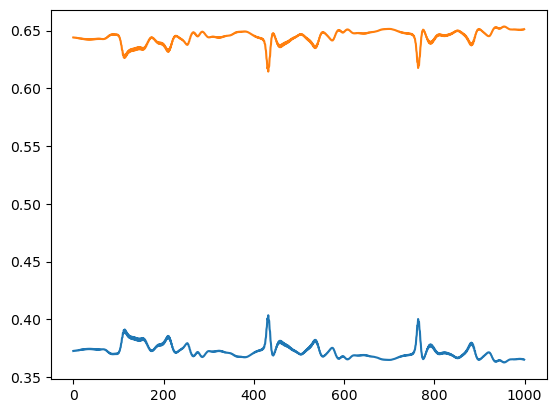

In [234]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), costs)
plt.plot(range(epochs), r2)

In [235]:
A = x_train
for layer in layers:
    A = layer.forward_prop(A)
#     y_pred.append(A)
y_pred = A
y_pred

array([[ 0.2157511 , -0.98707839, -0.73221064,  0.96483715, -0.38554536,
        -0.93402678,  0.08517397, -0.99999585, -0.99899566,  0.28110941,
        -0.95139205,  0.97554685, -0.46335791, -0.87199637, -0.99183047,
        -0.99959752, -0.96110952,  0.96228882, -0.39485028, -0.36595305,
         0.99927414,  0.68426243, -0.48058086,  0.46736193, -0.11257236,
        -0.39783154,  0.5704742 , -0.15779849, -0.82340771,  0.66507226,
         0.9984223 , -0.66056466, -0.15516308, -0.97161294, -0.50859847,
         0.96381266,  0.98564187, -0.21159742,  0.89805936, -0.83074904,
        -0.85370047, -0.99967066, -0.82298543, -0.12875677, -0.99689651,
         0.62616778,  0.96164756,  0.97458984, -0.7382124 ,  0.56239885,
        -0.98172724, -0.78310495, -0.99288898,  0.47755677, -0.56618983,
        -0.73947426, -0.12984348, -0.39637735,  0.99993747, -0.94572912,
         0.99711407,  0.76226641,  0.89749085,  0.56284209,  0.60523977,
        -0.30233584,  0.54951421,  0.72407992,  0.6

In [236]:
y_pred.shape

(1, 1000)

In [238]:
r2_acc(y_train[0], y_pred[0])

0.6510501783815275